##### Student Name: Nayem Alam
##### Student ID  : 260743549
##### Assignment 3

## Part 1.2 - graph-cut and Mean-Shift segmentation
    Q. 1,2 - graph-cut and Mean-Shift segmentation

### 1.2
### a)
### Segment the given image using normalized graph-cuts. Vary the following parameters (try several values of each parameter): compactness and n segments (slic function), thresh (cut normalized function). Display segmentation results for several parameters and state their effect on the output.


Threshold of: 0


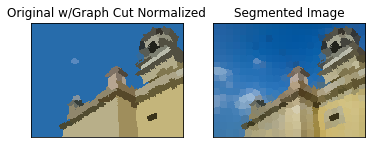

Threshold of: 10


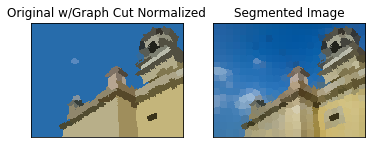

Threshold of: 20


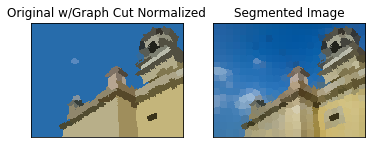

Threshold of: 30


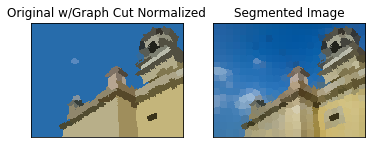

Threshold of: 40


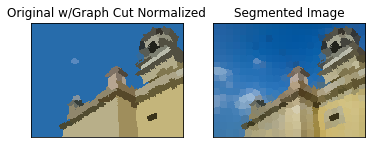

Threshold of: 50


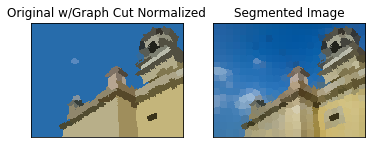

Threshold of: 60


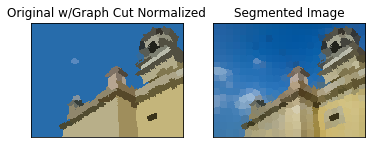

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import skimage
from skimage import segmentation, color
from skimage.future import graph
import math

# Read and display images with openCV
picLoc = "home.jpg"
home = cv2.imread(picLoc)
img = cv2.cvtColor(home, cv2.COLOR_BGR2RGB)

# Apply K-means
# try several values of each parameter

# vary only the compactness
labels1 = segmentation.slic(img, compactness=30, n_segments=400)
labels2 = segmentation.slic(img, compactness=50, n_segments=400)
labels3 = segmentation.slic(img, compactness=70, n_segments=400)

# vary only the n segments
labels4 = segmentation.slic(img, compactness=30, n_segments=400)
labels5 = segmentation.slic(img, compactness=30, n_segments=600)
labels6 = segmentation.slic(img, compactness=30, n_segments=800)

all_labels = [labels1,labels2,labels3,labels4, labels5,labels6]

# display results and see effect
out1 = color.label2rgb(labels1, img, kind='avg')
# apply graph cut
g = graph.rag_mean_color(img, labels1, mode='similarity')
labels2 = graph.cut_normalized(labels1, g)
out2 = color.label2rgb(labels2, img, kind='avg')

# vary thresholds
thresh = []
thresh = [0,10,20,30,40,50,60]
# print(len(thresh))

# check outputs with varying thresholds
for i in range(len(thresh)):
    print("Threshold of:",thresh[i])
    all_labels = graph.cut_threshold(labels1,g,thresh[i],in_place=True) # in_place modifies rag based on thresh
    outputs = color.label2rgb(all_labels, img, kind='avg')

    # display results for several parameters
    plt.subplot(121), plt.imshow(out2)
    plt.title("Original w/Graph Cut Normalized"), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(outputs)
    plt.title("Segmented Image"), plt.xticks([]), plt.yticks([])
    plt.show()

Varying the parameters makes a difference in terms of smoothness of the images. 
<ul>
    <li>
        <u>Varying Compactness:</u> <br>
        With compactness, the color, texture and the image features are grouped together<sup>[1](http://www.ijsret.org/pdf/120716.pdf)</sup>, as a result, this means that varying the compactness affects the color, texture and image feeatures.
    </li>
    <li>
        <u>Varying n segments:</u> <br>
        Affects the quality of the image. Incease nsegments gives us a crisper image at a certain limit, after that limit the image gets blurrier, similarly the lower the nsegments, the lower the quality of the image.
    </li>
    <li>
        Changing the <u>threshold</u> doesn't affect the compactness nor the nsegments.
    </li>
</ul>

### b)
### Segment the given image using mean-shift. Vary the following parameters (try several values of each parameter): ratio, kernel size, max dist. Display segmentation results for several parameters and state their effect on the output.

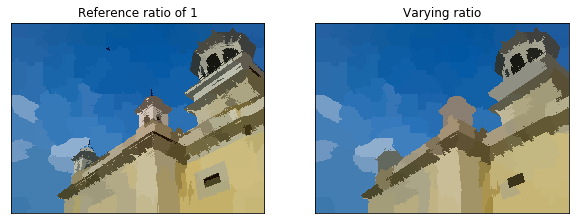

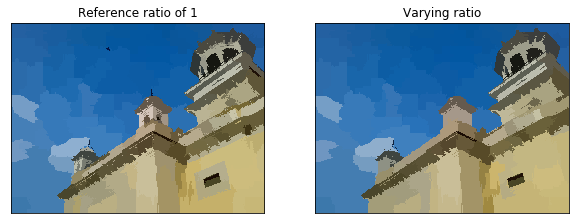

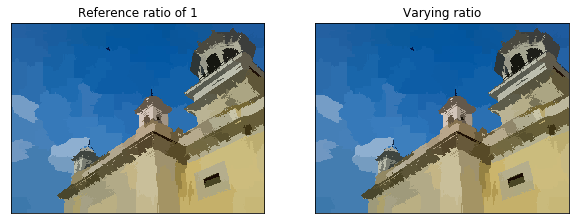

In [4]:
from skimage.segmentation import quickshift

# Read image
img = cv2.cvtColor(cv2.imread('home.jpg'), cv2.COLOR_BGR2RGB)

# parameters to vary: ratio, kernel size, max dist
ratio, kernel_size, max_dist =[],[],[]
ratio = [0.5,0.7,1.0]
kernel_size = [2,4,6]
max_dist = [10,20,30]

# apply meanshift
label = quickshift(img, max_dist=20)
out = color.label2rgb(label, img, kind='avg')

# check out ratio
for i in range(len(ratio)):
    # apply meanshift
    labelOrig = quickshift(img,ratio[2], max_dist=20)
    outOrig = color.label2rgb(labelOrig, img, kind='avg')
    
    all_labels = quickshift(img,ratio[i], max_dist=20)
    outputs = color.label2rgb(all_labels, img, kind='avg')
    
    plt.figure(figsize=(10,5))
    plt.subplot(121), plt.imshow(outOrig)
    plt.title("Reference ratio of 1"), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(outputs)
    plt.title("Varying ratio"), plt.xticks([]), plt.yticks([]) 
    plt.show()

Varying the parameters ratio, kernelsize and maximum distance:
<ul>
    <li>
        <u>Ratio:</u> <br>
        Focuses on color importance rather than spatial importance. As we increase the ratio size, it focuses more on the color<sup>[2](http://www.vlfeat.org/overview/quickshift.html)</sup>. 
    </li>
    <li>
        <u>kernelSize:</u> <br>
        Focuses on the density. It is the size of the kernel being used to estimate the density.
    </li>
    <li>
        <u>maxDist</u> <br>
        Maximum distance (maxDist) is the limit on the distance between nearest neighbors. As we increase maxdist, superpixels become larger due to the fact that we can link less similar points<sup>[2]</sup>.
    </li>
</ul>